# News text data cleaning

### We are going to explore ways to clean text data, namely to remove unncessary sentences initiated by "baca juga" and "advertisement" strings. In this document we will explore several means of text cleaning, such as text segmentation using spaCy and NLTK, and by using heuristic approach to develop algorithm that cleans text data from aforementioned strings.

## 1. Reading dataset

#### We will be reading a dataset/corpus containing news text data.

In [762]:
import pandas as pd
import os

# reding the news dataset
news_dataset = pd.read_csv(f"{os.getcwd()}/news_dataset.csv")
news_dataset_clean = news_dataset.dropna(subset=['content']) # drop na values
news_dataset_clean['content'].drop_duplicates().reset_index(drop=True) # drop duplicate content
news_dataset_clean = news_dataset_clean.reset_index(drop=True)

print(news_dataset_clean["content"])

0      ALASKA — It's been snowing a lot lately in nor...
1      ESB Science Blast. 2.508 suka. An incredible S...
2      Suara.com - BRIZZI merupakan salah satu kartu ...
3      - Cash Tree Siapa sih yang tidak kenal dengan ...
4      KBEonline.id – Solo Leveling Season 2 episode ...
                             ...                        
897    HAIJAKARTA.ID – Nomor HP kamu bisa menerima sa...
898    JABAR EKSPRES – Hadir kembali link penghasil s...
899    Jakarta, benang.id – GoPay, unit bisnis Financ...
900    SINGAPORE: The Competition and Consumer Commis...
901    Once you sign up, $111 is added to your bonus ...
Name: content, Length: 902, dtype: object


#### The dataset contains 902 rows of news texts.

In [763]:
import warnings

warnings.simplefilter("ignore", UserWarning)

# regex with the unecessary keywords
regex_unecessary_words = r"(?i)\b(baca juga|advertisement|iklan)\b"

# add new column matches where True indicates instances of news text with unecessary word
news_dataset_clean['matches'] = news_dataset_clean['content'].str.contains(regex_unecessary_words)

# count the no. of True observation of column 'matches' and len of news_dataset_clean
nrow_matches = news_dataset_clean['matches'].sum()
nrow_news_dataset = len(news_dataset_clean)

print(f"{nrow_matches} instances of news text with unecessary words \n{nrow_matches/nrow_news_dataset:.2f} percent of instances with unecessary words")

310 instances of news text with unecessary words 
0.34 percent of instances with unecessary words


#### From 902 instances, there are 310 instances (34%) of news text containing unecessary words. Below are the randomly picked news text containing aforementioned words:

In [764]:
import random
import re

# the keywords inside the regex for loop
key_unecessary_words = ["baca juga", "advertisement", "iklan"]

# looping each keyword in key_unecessary_words
for keyword in key_unecessary_words:
    matches = news_dataset_clean[news_dataset_clean['content'].str.contains(r'(?i)\b' + re.escape(keyword) + r'\b', na=False)]
    matches = matches.reset_index(drop=True) # reset the indexing
    print(f"--- Unecessary words: {keyword} ({len(matches)} observations) ---")

    if len(matches) > 0:
        for num in range(min(3, len(matches))):
            random_news_instance = random.randint(0, len(matches) - 1)
            print(f"Random news {num}: {matches['content'].iloc[random_news_instance]}\n")
    else:
        print(f"No matches for {keyword} found in the dataset.\n")

--- Unecessary words: baca juga (291 observations) ---
Random news 0: Suara.com - Untuk top up saldo OVO sebesar Rp300.000 di Indomaret, perlu disiapkan biaya top up dan biaya admin. Biaya minimal top up OVO di Indomaret sebesar Rp10.000 dan biaya admin top up sebesar Rp1.500 per transaksi. Jadi jika akan mengisi Rp300 ribu, maka yang dibayar adalah jumlah top up plus biaya admin yakni Rp300 ribu ditambah Rp1.500. Cara top up OVO di Indomaret Kunjungi Indomaret terdekat dan beritahu kasir kalau ingin top up OVO. Informasikan nomor telepon yang terdaftar di akun OVO. PIlih nominal top up yang diinginkan. Bayar dengan barcode QRIS yang diberikan oleh kasir atau buka menu kode bayar di aplikasi GoPay. Masukkan PIN GoPay dan berhasil! Bukti pembayaran akan muncul di aplikasi GoPay dan struk Indomaret. Kalau saldo OVO belum masuk dalam waktu 1x24 jam, bisa mendatangi Indomaret kembali dengan membawa struk hasil top up. Manfaat Menggunakan OVO Kemudahan transaksi keuangan Ovo memungkinkan pe

#### Using regular expression, it is detected that there are 310 instances of news texts containing "baca juga", "advertisement", or "iklan" strings. We can also see the random news text containing the mentioned strings through regular expression (regex). However it is important to take these into consideration:
1. The regex retrieves solely news with abovementioned strings; it does not take the sentence where the strings are bound into consideration (e.g., the "baca juga" strings can take place in non-initial positions; the strings could be part of phrases of meaningful sentences, instead of just a imperative phrase redirecting readers to other news articles)
2. The strings "iklan" and "advertisement" seem to only be noises when the words are all capitalized

#### To account for this problem, we will:
1. Modify the regex to only filter out the strings "iklan" and "advertisement" when they are all capitalized
2. Use spaCy to segment the news into separate sentences, then modify the regex expression to filter out "baca juga" in sentence initial positions

## 2. Updating regular expressions

In [765]:
# new regex expression, where "iklan" and "advertisement" are only retrieved when in uppercase
new_regex = r"(?i)\b(baca juga)\b|\b(ADVERTISEMENT|IKLAN)\b"

new_dataset = news_dataset_clean

# add new column matches where True indicates instances of news text with unecessary word
new_dataset['matches'] = new_dataset['content'].str.contains(new_regex)

# count the no. of True observation of column 'matches' and len of news_dataset_clean
new_nrow_matches = new_dataset['matches'].sum()
new_nrow_news_dataset = len(new_dataset)

print(f"{new_nrow_matches} instances of news text with unecessary words \n{new_nrow_matches/new_nrow_news_dataset:.2f} percent of instances with unecessary words")

310 instances of news text with unecessary words 
0.34 percent of instances with unecessary words


In [766]:
# the keywords inside the regex for loop
new_unecessary_words = ["baca juga",  "ADVERTISEMENT", "IKLAN"]

# looping each keyword in key_unecessary_words
for keyword in new_unecessary_words:
    if keyword == "baca juga":
        pattern = r"(?i)\b" + re.escape(keyword) + r"\b"  # case-insensitive for "baca juga"
    else:
        pattern = r"\b" + re.escape(keyword) + r"\b"  # exact match for "ADVERTISEMENT" and "IKLAN"
    
    new_matches = new_dataset[new_dataset['content'].str.contains(pattern, na=False)] # subset dataframe containing keyword
    new_matches = new_matches.reset_index(drop=True) # reset the indexing
    print(f"--- Unecessary words: {keyword} ({len(new_matches)} observations) ---")
    
    if len(new_matches) > 0:
        for num in range(min(3, len(new_matches))):
            random_news_instance = random.randint(0, len(new_matches) - 1)
            print(f"Random news {num}: {new_matches['content'].iloc[random_news_instance]}\n")
    else:
        print(f"No matches for {keyword} found in the dataset.\n")

--- Unecessary words: baca juga (291 observations) ---
Random news 0: Simak informasi selengkapnya, kamu bisa klaim saldo DANA gratis hingga Rp300.000. Baca Juga: Bonus THR Cair! Klaim Saldo DANA Gratis Rp178.000 dari Aplikasi Penghasil Uang 2025Cara Dapat Saldo DANA Gratis Berikut dua cara yang bisa kamu gunakan untuk mendapatkan saldo e-wallet DANA dengan gratis. 1. Menggunakan Link DANA Kaget DANA Kaget merupakan sebuah fitur di aplikasi DANA yang memungkinkan penggunanya meraih saldo gratis melalui link. Pengirim akan membagikan tautan khusus dengan format https://link.dana.id/kaget di berbagai platform online seperti media sosial. Kamu hanya perlu menemukan dan mengakses tautan tersebut untuk meraih uang gratis di dalamnya. Baca Juga: Inilah Cara Hasilkan Saldo DANA Gratis Rp150.000 dari Aplikasi Penghasil Uang Terbukti Membayar! Cukup tap gambar amplop digital, maka saldo DANA gratis akan masuk ke dompet elektronik kamu dengan mudah. 2. Menggunakan Aplikasi Penghasil Uang Beberap

#### The modification of the regex has decreased the number of observation of text with "iklan" and "advertisement" strings. It also showed that some the string "advertisement" are sentence-bound. 

#### To conclude, from these strings: "baca juga", "advertisement", and "iklan", two are likely to be sentence-bound: "baca juga" and "advertisement". Therefore, we will use spaCy library to work with these strings.

#### As of the other strings: the non-sentence-bound "iklan" and "advertisement" in uppercase, we will use regex to clean those strings from news texts.

## 3. Sentence segmentation/tokenization with spaCy

In [767]:
import spacy

nlp = spacy.load("xx_ent_wiki_sm")
sentencizer = nlp.add_pipe('sentencizer')
sentencizer.from_disk(f"{os.getcwd()}/sentencizer.json") # json file with list of punctuation mark

text = "The U.S. Drug Enforcement Administration (DEA) says hello. And have a nice day. Halo! Berikut merupakan teks berbahasa Indonesia. Presiden A.S. baru saja memberikan pidato di depan Gedung Putih."

text_unpunctuated = "She loves to read books on weekends she enjoys visiting the library and discovering new authors he prefers to read mystery novels and often finishes one in a day their favorite place is the bookstore which is near the park they meet there every Saturday morning to share their new finds they sometimes discuss their favorite characters and plot twists with excitement"

# Process the text using spaCy
doc = nlp(text)

# Print the segmented sentences
for sent in doc.sents:
    print(sent.text)

# Process the text using spaCy
doc = nlp(text_unpunctuated)

# Print the segmented sentences
for sent in doc.sents:
    print(sent.text)

The U.S. Drug Enforcement Administration (DEA) says hello.
And have a nice day.
Halo!
Berikut merupakan teks berbahasa Indonesia.
Presiden A.S. baru saja memberikan pidato di depan Gedung Putih.
She loves to read books on weekends she enjoys visiting the library and discovering new authors he prefers to read mystery novels and often finishes one in a day their favorite place is the bookstore which is near the park they meet there every Saturday morning to share their new finds they sometimes discuss their favorite characters and plot twists with excitement


#### The spaCy setencizer pipe works by segmenting sentences delimited by punctuation marks in a smart way. Unlike regex which is more exact in nature, spaCy setencizer takes into consideration abbreviations, such as "A.S." and "U.S." It can handle both Indonesian and English

#### Caveat: The spaCy setencizer pipe does not work well with unpunctuated text. We could create a function to make rough estimates of sentences in unpunctuated text, however it does not retrieve acccurate results.

## 4. Sentence segmentation with NLTK

In [768]:
import nltk

text = "The U.S. Drug Enforcement Administration (DEA) says hello. And have a nice day. Halo! Berikut merupakan teks berbahasa Indonesia. Presiden A.S. baru saja memberikan pidato di depan Gedung Putih."

text_unpunctuated = "She loves to read books on weekends she enjoys visiting the library and discovering new authors he prefers to read mystery novels and often finishes one in a day their favorite place is the bookstore which is near the park they meet there every Saturday morning to share their new finds they sometimes discuss their favorite characters and plot twists with excitement"

tokenized_text = nltk.tokenize.sent_tokenize(text)

for token in tokenized_text:
    print(token)

tokenized_text = nltk.tokenize.sent_tokenize(text_unpunctuated)

for token in tokenized_text:
    print(token)

The U.S. Drug Enforcement Administration (DEA) says hello.
And have a nice day.
Halo!
Berikut merupakan teks berbahasa Indonesia.
Presiden A.S. baru saja memberikan pidato di depan Gedung Putih.
She loves to read books on weekends she enjoys visiting the library and discovering new authors he prefers to read mystery novels and often finishes one in a day their favorite place is the bookstore which is near the park they meet there every Saturday morning to share their new finds they sometimes discuss their favorite characters and plot twists with excitement


#### Just like spaCy sentencizer pipe, the NLTK tokenize method also works by segmenting sentences delimited by punctuation marks in a smart way. It can also handle both Indonesian and English. NLTK is more faster than spaCy.

#### Caveat: Just like the spaCy setencizer pipe, it does not work well with unpunctuated text.

#### The challenge of sentence segmentation from both models come from the fact that they cannot detect sentences in unpunctuated text. Meanwhile, most of "baca juga" string sentences are not delimited by any punctuation marks. 

## 5. Heuristic approach to text data cleaning

#### From previous observation, we know that the strings "baca juga" and "advertisement" are sentence bound. Since spaCy and NLTK segment sentence based on a hybrid nature and it cannot segment sentences in an unpunctuated text, we need to move to a heuristic approach. We need to understand the patterns of the sentences in which the strings "baca juga" and "advertisement" are bound to, so that we can develop an algorithm that cleans them from text data. For this, we will be analyzing the patterns of sentences bound to aforementioned strings. 

### 5.1. Analyzing sentence pattern bound with "baca juga" string

#### We will be parsing the 25 token of strings after "baca juga" string to observe the pattern of sentence bound with "baca juga" string.

In [769]:
contains_baca_juga = r"(?i)\b(baca juga)\b"

baca_juga_dataset = new_dataset[new_dataset['content'].str.contains(contains_baca_juga, na=False)]
baca_juga_dataset = baca_juga_dataset.reset_index(drop=True)

right_context_baca_juga = re.compile(r"(?i)(baca juga[:\-\s]+(?:[\w\W]+?)(?=\s+baca juga|$))")

# take 20 random news articles, print every instances of "baca juga" strings and its right context 
for num in range(20):
    print(f"--- Random news {num} ---")

    random_news_instance = random.randint(0, len(baca_juga_dataset) - 1)
    text = baca_juga_dataset['content'][random_news_instance]
    matches = right_context_baca_juga.finditer(text)
    for i, match in enumerate(matches, start=1):
        match_text = match.group(1).strip()  
        words = match_text.split()
        first_50_words = words[:50]
        
        print(f"Random text {i}: {' '.join(first_50_words)}\n")
    
    print("\n")

--- Random news 0 ---
Random text 1: Baca juga: Bank DKI Dukung Inovasi QRIS Tap NFC Bank Indonesia melalui JakOne Mobile 15 Bank dan E-Wallet yang sudah mendukung QRIS TAP Saat ini, QRIS TAP telah bekerja sama dengan 15 penyedia jasa pembayaran (PJP) yang mencakup perbankan dan dompet digital berikut: Bank yang mendukung QRIS TAP PT Bank

Random text 2: Baca juga: Sektor transportasi jadi contoh terapkan QRIS Tap NFC Bank DKI E-Wallet yang Mendukung QRIS TAP GoPay ShopeePay Dana Netzme Dengan dukungan dari berbagai bank dan e-wallet, QRIS TAP semakin mudah diakses oleh masyarakat dan merchant di seluruh Indonesia. Keunggulan QRIS TAP QRIS TAP memiliki beberapa keunggulan yang membuatnya

Random text 3: Baca juga: Mengenal QRIS TAP, sistem pembayaran NFC tanpa scan QR code Implementasi QRIS TAP di Indonesia Pada tahap awal, QRIS TAP telah diterapkan di layanan transportasi seperti MRT Jakarta, TransJakarta, DAMRI, dan Trans Sarbagita Bali. Rencananya, layanan ini akan diperluas ke moda

#### 5.1.1. We can observe that:
1. The substantial amount of word-initials in sentences bound with "baca juga" string are capitalized, e.g. f"{r'(?i)\b(baca juga)\b'}{r':| |'}{'Lorem Ipsum Dolor Sit Amet'}"
2. For long-length sentences bound with "baca juga" string where the word-initials are capitalized, punctuation marks such as [".", "!"] often indicate the end of the sentence bound with the string.
3. If punctuation marks cannot be found in long-length sentences bound with "baca juga" string where the word-initials are capitalized, the penultimate word-initial capitalized character often indicate the end of the sentence bound with the string, e.g. SEN[STR[Baca Juga Restitusi Pajak Awal Tahun Meningkat, Tanda Geliat Dunia Usaha Lesu] RCT[Blibli telah lama dikenal sebagai aplikasi belanja online terkemuka di Indonesia.]]
4. The characters bound with "baca juga" string that are short in length are likely to indicate a whole sentence bound with "baca juga" string, e.g. f"{r'(?i)\b(baca juga)\b'}{r':| |'}{Baca Juga Saldo DANA Gratis Hari Ini: Dapatkan hingga Rp250 Ribu dengan Mudah!}". This is because the regex stops parsing sentence if its followed with another "baca juga" string.
5. As with point 5.1.1.2., the characters bound with "baca juga" string that are short in length and ends with punctuation marks are likely to indicate a whole sentence bound with "baca juga" string.

#### 5.1.2. Problems:
1. A benchmark to determine the end of long-length sentences bound with "baca juga" string characters has to be established. It has only been established in 5.1.1.4. and 5.1.1.5. that a sentence bound with "baca juga" string is of a whole only and if only it is short-length and/or ends with punctuation marks. Several sentences bound with "baca juga" strings are long-length and/or does not end with punctuation mark.
2. As said in 5.1.1.2., sentences bound with "baca juga" strings often end with exclamation mark "!". However, it is important to note that sentences bound with "baca juga" strings often contains multiple exclamation marks. It is important to understand the statistics of the frequency of exclamation marks inside sentences bound with "baca juga" strings to capture the entirity of the sentences.

#### 5.1.3. Todo:
1. As with point  5.1.1.4., the length of the short sentences bound with "baca juga" strings are to be determined by finding the quartiles and distribution of strings/characters retrieved by right_context_baca_juga regex.

#### 5.1.4. Insights and solution:
1. Sentences with short-length characters are the main identification of a whole sentence bound with "baca juga" string
2. Exclamation "!" marks is the second main identification of a whole sentence bound with "baca juga" string
3. Period "." marks is the third main identification of a whole sentence bound with "baca juga" string
4. Penultimate word in sentences with succesive word-initial capitalizations
5. Potential of utilization of NLTK for sentence segmentation for text cleaning


#### 5.1.5. Finding the statistics and plotting data visualizations for the length of characters in right context of sentences initiated by "baca juga" string

#### We will be plotting the histogram and cumulative frequency distribution of the length of characters in right context of sentences initiated by "baca juga" string to set the benchmark for data cleaning algorithm. And since most sentence bound with "baca juga" string are short, we will arbitrarily choose 100 as the maximum amount of words retrieved in the right context of the sentences.

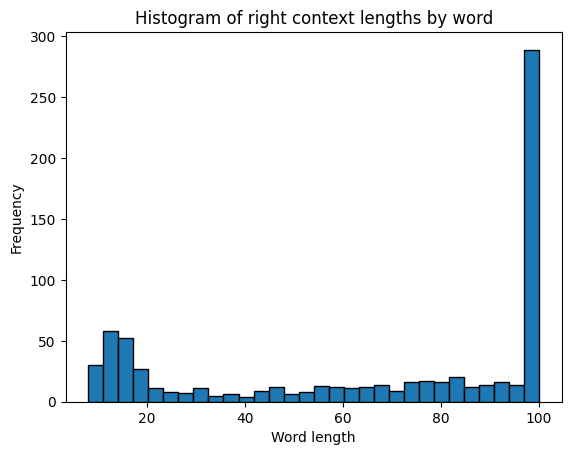

*** Statistics ***
Mean: 66.93
Q1: 26.0
Q2/median: 81.0
Q3: 100.0
IQR: 74.0


In [770]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

context_lengths = {}

for i in range(len(baca_juga_dataset)):
    sentence = baca_juga_dataset['content'][i]
    matches = right_context_baca_juga.finditer(sentence)
    for match in matches:
        match_text = match.group(1).strip()  
        words_in_context = match_text.split()
        first_100_words = words_in_context[:100]
        right_context = ' '.join(first_100_words)
        context_lengths[right_context] = len(first_100_words)

context_lengths_values = list(context_lengths.values())

plt.hist(context_lengths_values, bins=30, edgecolor='black')
plt.title('Histogram of right context lengths by word')
plt.xlabel('Word length')
plt.ylabel('Frequency')
plt.show()

mean = round(np.mean(context_lengths_values), 2)
q1 = np.percentile(context_lengths_values, 25)
q2 = np.percentile(context_lengths_values, 50)
q3 = np.percentile(context_lengths_values, 75)
iqr = q3-q1
lowerbound = q1 - 1.5 * iqr
upperbound = q3 + 1.5 * iqr

print(f"*** Statistics ***")
print(f"Mean: {mean}")
print(f"Q1: {q1}")
print(f"Q2/median: {q2}")
print(f"Q3: {q3}")
print(f"IQR: {iqr}")


#### This histogram shows that the right context of sentences bound with "baca juga" string have varying word length; many has over 100 words. It is worth noting that there is a modal range around the word length value of 0-25. This indicate the instances of sentence bound with "baca juga" string that needs to be deleted. 

#### In relation to the modal range point, we will visualize cumulative distribution of the word length to ensure that the sentences with words length over 25 does not increase steeply as the distribution hits closer to 100% of the data.

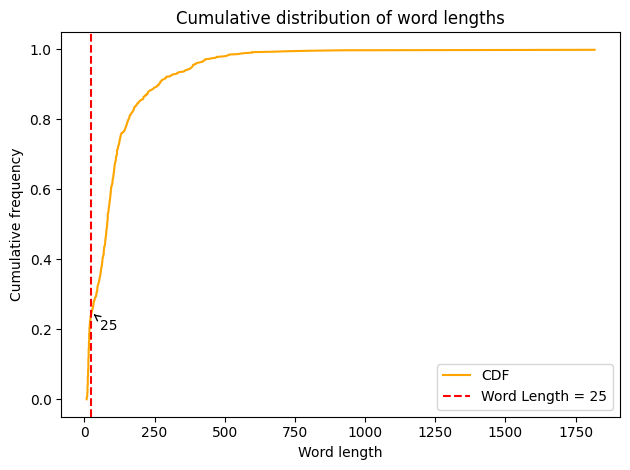

In [771]:
context_lengths = {}

for i in range(len(baca_juga_dataset)):
    sentence = baca_juga_dataset['content'][i]
    matches = right_context_baca_juga.finditer(sentence)
    for match in matches:
        match_text = match.group(1).strip()  
        words_in_context = match_text.split()
        right_context = ' '.join(words_in_context)
        context_lengths[right_context] = len(words_in_context)

context_lengths_values = list(context_lengths.values())

sorted_lengths = np.sort(context_lengths_values)
cdf = np.arange(len(sorted_lengths)) / float(len(sorted_lengths))

plt.plot(sorted_lengths, cdf, label='CDF', color='orange')

annotate_x = 25
y_position = np.interp(annotate_x, sorted_lengths, cdf)

plt.axvline(x=annotate_x, color='red', linestyle='--', label=f'Word Length = {annotate_x}')
plt.annotate(
    f"{annotate_x}", xy = (annotate_x, y_position),
    xytext = (annotate_x + 30, y_position - 0.05),
    arrowprops = dict(arrowstyle = '->', color = 'black'),
    fontsize = 10
)

plt.title("Cumulative distribution of word lengths")
plt.xlabel("Word length")
plt.ylabel("Cumulative frequency")
plt.legend()
plt.tight_layout()
plt.show()

#### This visualization shows that as the word length exceeds 25, the cumulative distribution frequency declines. Therefore we would use the value 25 as the benchmark for word length of irrelevant short sentences bound with "baca juga" string.

#### 5.1.6. Finding the statistics and plotting data visualizations for the frequency of exclamation marks inside of sentences bound with "baca juga" string

#### We will be plotting the histogram and cumulative frequency distribution of the frequency of exclamation marks inside of sentences bound with "baca juga" string to set the benchmark for data cleaning algorithm.

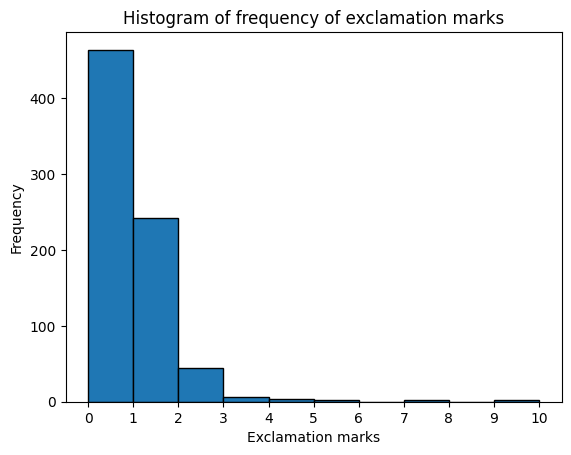

*** Statistics ***
Mean: 0.53
Q1: 0.0
Q2/median: 0.0
Q3: 1.0
IQR: 1.0

*** Exclamation mark count ***
0 exclamation mark: 464
1 exclamation mark: 242
2 exclamation marks: 44
3 exclamation marks: 6
4 exclamation marks: 4
≥5 exclamation marks: 6


In [772]:
count_exclamation_marks = []

for sentence_index in range(len(baca_juga_dataset)):
    sentence = baca_juga_dataset['content'][sentence_index]
    matches = right_context_baca_juga.finditer(sentence)
    for match in matches:
        match_text = match.group(1).strip()  
        words_in_context = match_text.split()
        right_context = ' '.join(words_in_context)
        exclamation_count = right_context.count("!")
        count_exclamation_marks.append(exclamation_count)

plt.hist(count_exclamation_marks, bins=10, edgecolor='black')
plt.title('Histogram of frequency of exclamation marks')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.xlabel('Exclamation marks')
plt.ylabel('Frequency')
plt.show()

mean = round(np.mean(count_exclamation_marks), 2)
q1 = np.percentile(count_exclamation_marks, 25)
q2 = np.percentile(count_exclamation_marks, 50)
q3 = np.percentile(count_exclamation_marks, 75)
iqr = q3-q1
lowerbound = q1 - 1.5 * iqr
upperbound = q3 + 1.5 * iqr

print(f"*** Statistics ***")
print(f"Mean: {mean}")
print(f"Q1: {q1}")
print(f"Q2/median: {q2}")
print(f"Q3: {q3}")
print(f"IQR: {iqr}")

print(f"\n*** Exclamation mark count ***")
print(f"0 exclamation mark: {count_exclamation_marks.count(0)}")
print(f"1 exclamation mark: {count_exclamation_marks.count(1)}")
print(f"2 exclamation marks: {count_exclamation_marks.count(2)}")
print(f"3 exclamation marks: {count_exclamation_marks.count(3)}")
print(f"4 exclamation marks: {count_exclamation_marks.count(4)}")
print(f"≥5 exclamation marks: {sum(1 for num in count_exclamation_marks if num >= 5)}")
        

#### This histogram shows that sentences bound with "baca juga" string with more than 3 exclamation marks are infrequent. Therefore we would use the value 3 as the benchmark for frequency of irrelevant short sentences bound with "baca juga" string.

In [773]:
# first stage of data cleaning pipeline

# regex = regex

# for i in range(len(df)):
    # news_article = df['content'][i]
    # matches = regex.finditer(news_article)
    
    # sentence_list = []

    # for match in matches:
        # match_text = match.group(1).strip()  
        # match_text_split = match_text.split()
        # right_context = ' '.join(match_text_split)
        # sentence_list.append(right_context)

    # for sentence in sentence_list:
        # if sentence in news_article:
            # news_article = news_article.replace(sentence, '')
        # else:
            # pass



In [774]:
# second stage of the data cleaning pipeline

# for sentence in sentence_list:
    # if len(sentence) > 0 and len(sentence) <= 25:
        # news_article = news_article.replace(sentence, '')
    # elif "!" in sentence:
        # if sentence.count("!") <= 3:
            # parts = sentence.split("!")
            # news_article = news_article.replace(sentence, '')
    # elif len(sentence) > 25:
        # if sentence.endswith(".") or sentence.endswith("!"):
            # news_article = news_article.replace(sentence, '')
         # else:
            # words = sentence.split()
            # for i in range(len(words) - 1):
                # if words[i].istitle() and words[i + 1].istitle():
                    # sentence = ' '.join(words[-2:])
                    # news_article = news_article.replace(' '.join(words), sentence)

#### 5.1.7. Applying word length and exclamation frequency benchmarks to parse irrelevant sentences

#### We will be applying the benchmarks in order to parse irrelevant sentences. We also be using NLTK to segment the sentences and analyze the patterns in each sentences.

In [781]:
no_news = 1
no_exclamation_mark = 0

for _ in range(len(baca_juga_dataset)):
    print(f"\n====================")
    print(f"News {no_news}")
    print(f"====================")

    random_news_instance = random.randint(0, len(baca_juga_dataset) - 1)
    text = baca_juga_dataset['content'][random_news_instance]
    matches = right_context_baca_juga.finditer(text)

    print(f"\n📄 Full article text:\n{text}\n")

    no_news += 1

    for i, match in enumerate(matches, start=1):
        match_text = match.group(1).strip()  
        words = match_text.split()
        sentence = ' '.join(words)

        no_news += 1

        print(f"🔎 ((Match {i})):")
        print(f"{sentence}")

        if no_exclamation_mark < 20:
            if sentence.count("!") <= 3:
                no_exclamation_mark += 1
                tokenized_sentence = nltk.tokenize.sent_tokenize(sentence)

                for token_index, token in enumerate(tokenized_sentence, start=1):
                    print(f"🔠 Token {token_index}: {token}")
                print("\n")
            else:
                print("❌ Sentence has more than 3 exclamation marks.\n")



News 1

📄 Full article text:
Butuh Dana Darurat? Simak Cara Dapatkan Pinjaman Saldo DANA Hingga Rp1.000.000 Tanpa BI Checking! Reporter: Fathah | Editor: Fathah | Jumat 21-03-2025,03:40 WIB Butuh Dana Darurat? Simak Cara Dapatkan Pinjaman Saldo DANA Hingga Rp1.000.000 Tanpa BI Checking!-ilustration by radarindramayu.id-radarindramayu.id Menggunakan layanan pinjam saldo DANA memiliki berbagai keuntungan, antara lain: Proses Cepat dan Praktis: Tidak perlu dokumen fisik atau jaminan. Tanpa Bunga (Berlaku untuk Program Tertentu): Beberapa pinjaman menawarkan skema tanpa bunga bagi pengguna setia. Cicilan Fleksibel: Bisa memilih metode pembayaran yang sesuai dengan kemampuan. BACA JUGA: Ngabuburit Cuan! Saldo Dana Gratis Rp400 Ribu Buat Kamu, Cuma Pakai Aplikasi Penghasil Uang Terbaru Ini! Keamanan Terjamin: DANA sebagai dompet digital yang sudah berlisensi memberikan perlindungan kepada penggunanya. Alternatif Pinjaman Digital Lainnya Selain fitur pinjam saldo DANA, beberapa platform E-Wa

#### We can observe that:
1. Short-length sentences with <10 words that ends with "!" strings or with consecutive word-initial capitalization and initiated by "baca juga" strings are irrelevant sentences
2. Medium-length sentences with <25 words with consecutive word-initial capitalization and initiated by "baca juga" are irrelevant sentences
3. Sentences with consecutive word-initial capitalization are partly irrelevant sentences

#### To further account for this observation, we will namely analyze the long sentences group in order to understand the patterns of meaningful data in the group: 

In [892]:
import random

def consecutive_caps(text):
    words = text.split()
    count = 0
    for word in words:
        if word and word[0].isupper():
            count += 1
            if count > 5:
                return True
        else:
            count = 0

    return False

def bad_punctuation(text):
    pattern = r'(?<=[.!?])(?=[A-Z])' # badly punctuated ".", "!", and "?"
    matches = re.findall(pattern, text)
    return len(matches) > 0

nlp = spacy.load("en_core_web_sm")

def no_person_names(text):
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == 'PERSON':
            return False  # Found a proper name
    return True  # No proper names found

def contains_org_name(text):
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == 'ORG':  # Common proper organization names
            return True
    return False

def two_initial_capital(text):
    words = text.strip().split()
    if len(words) < 2:
        return False
    return words[0][0].isupper() and words[1][0].isupper()

nword_dataset = len(baca_juga_dataset)
n_news = 1

news_token_short = {}
news_token_long = {}

for i in range(nword_dataset):
    #print(f"News {n_news}")
    n_news += 1
    random_news_instance = random.randint(0, nword_dataset - 1)
    text = baca_juga_dataset['content'][random_news_instance]
    matches = right_context_baca_juga.finditer(text)

    for match_index, match in enumerate(matches, start=1):
        match_text = match.group(1).strip()  
        words = match_text.split()
        sentence = ' '.join(words)

        sentence_is_badly_punctuated = bad_punctuation(sentence)

        if sentence_is_badly_punctuated:
            sentence = re.sub(r'(?<=[.!?])(?=[A-Z])', ' ', sentence)

        #print(f"Match {match_index}: {sentence}")

        tokenized_sentence = nltk.tokenize.sent_tokenize(sentence)

        for token_index, token in enumerate(tokenized_sentence, start=1):
            token_is_short = len(token.split()) <= 10
            token_is_medium = len(token.split()) > 10 and len(token.split()) <= 25
            token_is_long = len(token.split()) >25

            token_starts_with_baca_juga = token.lower().startswith("baca juga")
            token_ends_with_exclamation = token.endswith("!")

            token_with_consecutive_caps = consecutive_caps(token)
            token_is_badly_punctuated = bad_punctuation(token)
            token_two_initial_capital = two_initial_capital(token)
            token_without_person_names = no_person_names(token) == True
            token_with_org_names = contains_org_name(token) == True

            if (
                token_is_short and 
                token_starts_with_baca_juga and 
                (token_with_consecutive_caps or 
                token_ends_with_exclamation)
            ):
                print(f"CRITERIA 1: {token}") # FIXED
                text = text.replace(token, '')

            elif (
                token_is_short and 
                (token_with_consecutive_caps or 
                token_ends_with_exclamation)
            ):
                print(f"CRITERIA 2: {token}") # FIXED
                text = text.replace(token, '')
            
            elif (
                token_is_medium and 
                token_starts_with_baca_juga and 
                (token_with_consecutive_caps or 
                token_ends_with_exclamation)
            ):
                print(f"CRITERIA 3: {token}") # FIXED
                text = text.replace(token, '')

            elif (
                token_is_medium and 
                (token_with_consecutive_caps or 
                token_ends_with_exclamation)
            ):
                print(f"CRITERIA 4: {token}") #

                if (
                    token_two_initial_capital and
                    token_with_org_names and 
                    token_ends_with_exclamation
                ):
                    #print(f"CRITERIA 4A: {token}") FIXED
                    text = text.replace(token, '')

                elif (
                    token_two_initial_capital and
                    token_with_org_names and
                    token_with_consecutive_caps
                ):
                    tokenized_token = nltk.tokenize.sent_tokenize(token) # segmenting sentences because some sentences contains more than 1 sentences

                    for token_index, token in enumerate(tokenized_sentence, start=1):
                        if token_with_org_names and token_with_consecutive_caps:
                            print(f"Token {token_index}: {token}")
            #elif (
                #token_is_long and
                #token_with_consecutive_caps
            #):
                #print(f"CRITERIA 3: {token}")
                #text = text.replace(token, '')

CRITERIA 1: Baca Juga: Cuma Dari Rumah Bisa Dapat Penghasilan Rp4 Juta?
CRITERIA 2: Ini Rahasia Hasilkan Saldo DANA Gratis dari Website, Cek Selengkapnya!
CRITERIA 1: BACA JUGA: Aplikasi Hifami Bikin Heboh!
CRITERIA 2: Cuma Rebahan Bisa Dapat Uang Sampe Ratusan Ribu?
CRITERIA 2: Cek Faktanya!
CRITERIA 1: BACA JUGA: Dana Kaget Terbaru Hari Ini Cair Sampai Rp.200.000!
CRITERIA 2: Simak Cara Klaim Sebelum Kehabisan!
CRITERIA 4: Nah, kali ini kami membagikan saldo DANA Kaget untuk kamu secara gratis!
CRITERIA 2: CARA KLAIM SALDO DANA KAGET RP200.000!
CRITERIA 2: Saldo Akan Masuk Secara Acak ke akunmu!
CRITERIA 2: Catatan Penting!
CRITERIA 4: Nominal saldo berbeda untuk setiap pengguna – Bisa dapat Rp1, Rp10, Rp100, 000, Rp50.000, bahkan hingga Rp200.000!
CRITERIA 2: Saldo langsung masuk ke akun DANA-mu jika kamu berhasil mengklaimnya!
CRITERIA 2: Bagikan link ke teman, keluarga, atau komunitasmu!
CRITERIA 3: BACA JUGA: Manfaat Dompet Digital di Bulan Ramadan: Belanja Mudah, Zakat Praktis, 

In [776]:
import random

no_news = 0
exclamation_mark_instances = 0
counters = 0

def consecutive_caps(text):
    words = text.split()
    count = 0
    for word in words:
        if word and word[0].isupper():
            count += 1
            if count > 5:
                return True
        else:
            count = 0

    return False

nword_dataset = len(baca_juga_dataset)
n_news = 1

news_token_short = {}
news_token_long = {}

for _ in range(nword_dataset):
    random_news_instance = random.randint(0, nword_dataset - 1)
    text = baca_juga_dataset['content'][random_news_instance]
    matches = right_context_baca_juga.finditer(text)
    
    for i, match in enumerate(matches, start=1):
        match_text = match.group(1).strip()  
        words = match_text.split()
        sentence = ' '.join(words)
        
        exclamation_in_sentence = "!" in sentence
        exclamation_benchmark = sentence.count("!") == 1 and sentence.count("!") <= 3

        if exclamation_in_sentence and exclamation_benchmark:
            tokenized_sentence = nltk.tokenize.sent_tokenize(sentence)
            
            short_dict = {}
            long_dict = {}

            for token_index, token in enumerate(tokenized_sentence, start=1):
                if token.endswith("!") and len(token.split()) < 10 and consecutive_caps(token):
                    short_dict[token] = len(token.split())
                    text = text.replace(token, '')
                elif not token.endswith("!") and consecutive_caps(token) == True:
                    # parse penultimate string if sentence len exceeds the new benchmark
                    # remove sentence if just around the benchmark
                    long_dict[token] = len(token.split())
                    text = text.replace(token, '')

            if short_dict:
                news_token_short[n_news] = short_dict
            if long_dict:
                news_token_long[n_news] = long_dict

            if short_dict or long_dict:
                n_news += 1

print("--- Short news ---")
if news_token_short:
    short_sample_ids = random.sample(list(news_token_short.keys()), k=min(20, len(news_token_short)))

    for news_id in short_sample_ids:
        print(f"News {news_id}:")
        sentences = news_token_short[news_id]
        
        for n, (sentence, length) in enumerate(sentences.items(), start=1):
            print(f"  Sentence {n}: {sentence}")
        print()
else:
    print("No short sentence data found.\n")

print("--- Long news ---")
if news_token_long:
    long_sample_ids = random.sample(list(news_token_long.keys()), k=min(20, len(news_token_long)))

    for news_id in long_sample_ids:
        print(f"News {news_id}:")
        sentences = news_token_long[news_id]
        
        for n, (sentence, length) in enumerate(sentences.items(), start=1):
            print(f"  Sentence {n}: {sentence}")
        print()
else:
    print("No long sentence data found.\n")


--- Short news ---
News 132:
  Sentence 1: BACA JUGA: Pinjam Saldo DANA Tanpa KTP!

News 8:
  Sentence 1: BACA JUGA: Ambil Saldo DANA Gratis Sekarang!

News 79:
  Sentence 1: BACA JUGA: Tanpa Modal, Tanpa Ribet Cair Rp200 Ribu!

News 98:
  Sentence 1: BACA JUGA: Split Bill Jadi Mudah!

News 39:
  Sentence 1: BACA JUGA: Tanpa Modal, Tanpa Ribet Cair Rp200 Ribu!

News 92:
  Sentence 1: BACA JUGA: Bareskrim Polri Bongkar Sindikat Pemalsuan Minyakita!

News 122:
  Sentence 1: BACA JUGA: Tanpa Modal, Tanpa Ribet Cair Rp200 Ribu!

News 85:
  Sentence 1: BACA JUGA: Ambil Jatah THR DANA Kaget Sekarang!

News 104:
  Sentence 1: BACA JUGA: Tak Perlu Takut Ilegal!

News 106:
  Sentence 1: BACA JUGA: Langsung Cair Sehari Kerja!

News 128:
  Sentence 1: BACA JUGA: Split Bill Jadi Mudah!

News 103:
  Sentence 1: BACA JUGA: Puasa Tenang, Dompet Aman!

News 4:
  Sentence 1: BACA JUGA: Ambil Saldo DANA Gratis Sekarang!

News 54:
  Sentence 1: BACA JUGA: Sumardji Bocorkan Kabar Terbaru!

News 60:
  Sent

#### By applying all relevant benchmarks and analyzing the long setences, it is observable that there is a discrepancy of the word length of irrelevant sentences in long sentence group, where sentences exceeding the benchmarks of word length of irrelevant sentences contains only part of relevant sentences that needs to be subsetted.

#### In order to be able to subset the meaningful data from long setences bound with "baca juga" string, we need to understand the statistics of the word length in the long sentence group. Following is the statistics as well as data visualization thereof.

#### 5.1.8. Statistics of (ir)relevant sentences in long sentence group

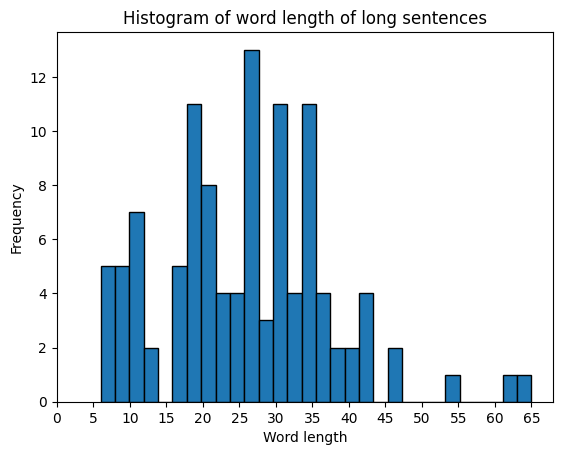

*** Statistics ***
Mean: 25.65
Q1: 18.0
Q2/median: 26.0
Q3: 33.75
IQR: 15.75


In [777]:
token_len_value =  [list(inner_dict.values())[0] for inner_dict in news_token_long_len.values()]

plt.hist(token_len_value, bins=30, edgecolor='black')
plt.title('Histogram of word length of long sentences')
plt.xlabel('Word length')
plt.ylabel('Frequency')
plt.xticks(range(0, max(token_len_value)+5, 5))
plt.show()

mean = round(np.mean(token_len_value), 2)
q1 = np.percentile(token_len_value, 25)
q2 = np.percentile(token_len_value, 50)
q3 = np.percentile(token_len_value, 75)
iqr = q3-q1
lowerbound = q1 - 1.5 * iqr
upperbound = q3 + 1.5 * iqr

print(f"*** Statistics ***")
print(f"Mean: {mean}")
print(f"Q1: {q1}")
print(f"Q2/median: {q2}")
print(f"Q3: {q3}")
print(f"IQR: {iqr}")

#### This historgram and the statistics shows that 75% of the long sentences contain <= 33,5 words. Therefore we will be setting our benchmark for relevant sentences in long sentence group as sentence containing <= 35 words. That means we will be considering sentences having <= 35 words in long sentence group as irrelevant sentences.

#### Todo: handle sentences longer than aforementioned benchmark in long sentence group